In [213]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms , ToPILImage
import torchvision.transforms.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image

import os

In [10]:
torch.__version__

'1.13.1'

In [160]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
SPLIT = 0.7

In [145]:
class UAVDataset(Dataset):
    def __init__(self, img_dir, mask_dir, transform = None):
        self.img_dir = img_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(img_dir))
        self.masks = sorted(os.listdir(mask_dir))
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.img_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.masks[index])
        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("RGB") #multi-channel segmentation
        
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        return image, mask

In [146]:
Transform = transforms.Compose([
    transforms.ToTensor()
])

In [147]:
img_dir = os.path.join(os.getcwd(), 'image')
mask_dir =  os.path.join(os.getcwd(), 'mask')

In [148]:
img_dir, mask_dir

('/Users/aneeshsathe/Desktop/u-net/image',
 '/Users/aneeshsathe/Desktop/u-net/mask')

In [149]:
data = UAVDataset(img_dir = img_dir, mask_dir = mask_dir, transform = Transform)

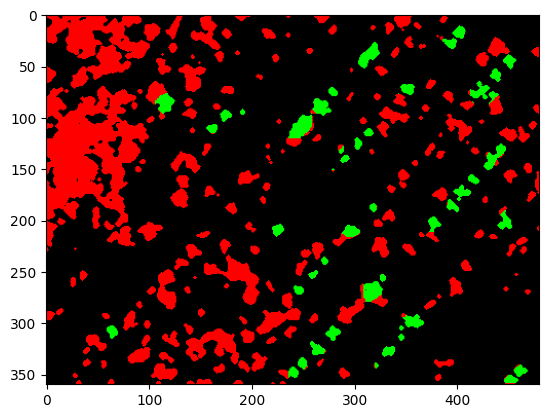

In [150]:
plt.imshow(data[5][1].permute(1,2,0))

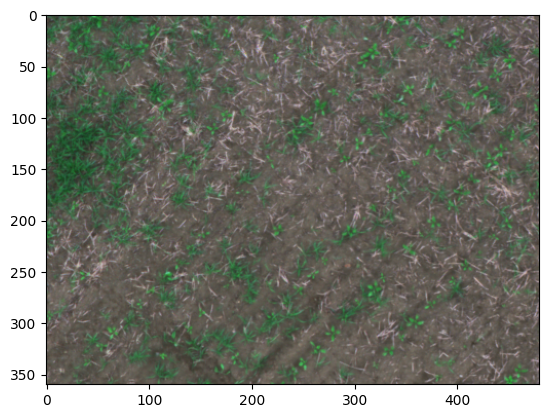

In [151]:
plt.imshow(data[5][0].permute(1,2,0))

In [152]:
data[1][0]

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.2353, 0.2627, 0.2824,  ..., 0.3608, 0.3922, 0.4667],
         [0.2118, 0.2235, 0.2471,  ..., 0.3608, 0.4039, 0.4667],
         [0.1922, 0.2000, 0.2235,  ..., 0.3765, 0.3804, 0.4000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.5059, 0.4745, 0.3961,  ..., 0.3176, 0.3490, 0.4353],
         [0.3647, 0.3216, 0.3608,  ..., 0.3098, 0.3804, 0.4314],
         [0.2941, 0.2902, 0.3216,  ..., 0.3490, 0.3647, 0.3804]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

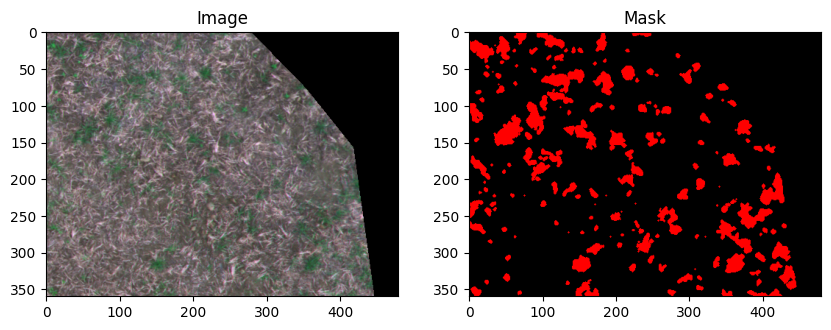

In [267]:
image = data[7][0].permute(1, 2, 0)
mask = data[7][1].permute(1, 2, 0)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image)
ax1.set_title('Image')
ax2.imshow(mask)
ax2.set_title('Mask')
plt.show()

In [155]:
mask.shape

torch.Size([360, 480, 3])

In [156]:
image.shape

torch.Size([360, 480, 3])

In [161]:
train_size = int(len(data)*SPLIT)
test_size = len(data) - train_size

trainData, testData = random_split(data, [train_size, test_size])

In [166]:
len(testData)

65

In [167]:
trainDL = DataLoader(trainData, batch_size = 16, shuffle = True)
testDL = DataLoader(testData, batch_size = 16, shuffle = True)

In [171]:
trainDL

In [222]:
for batch in trainDL:
    img, mask = batch
    print(img.size())
    break

torch.Size([16, 3, 360, 480])


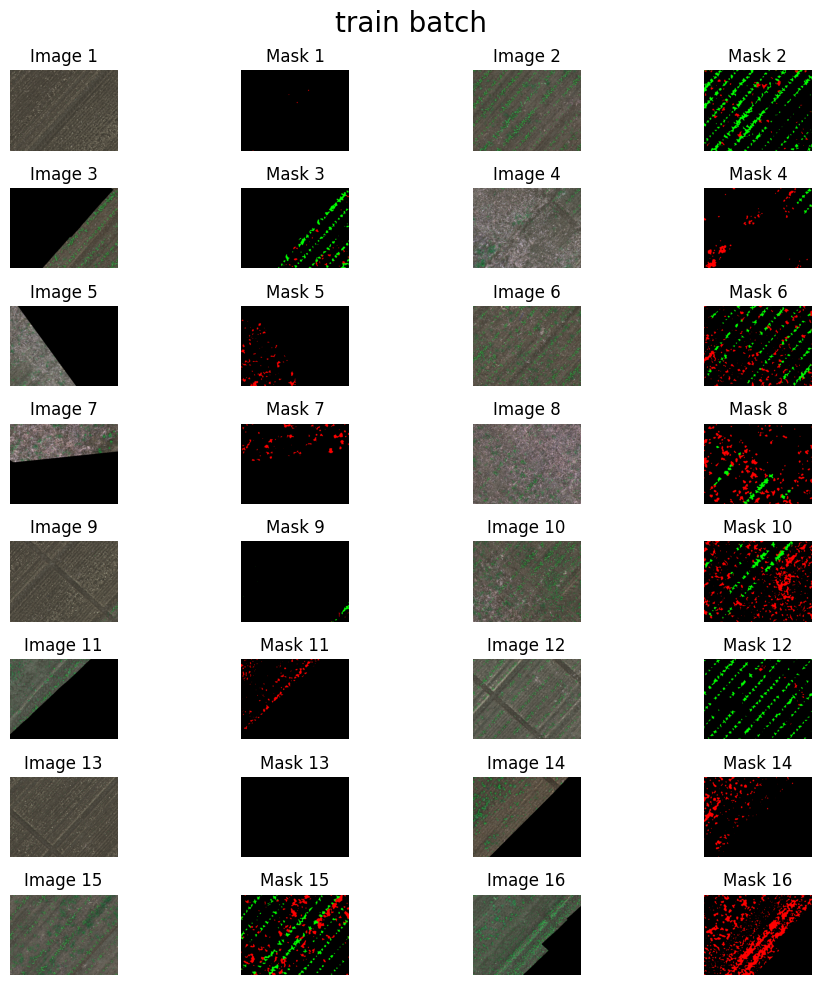

In [261]:
 for batch_idx, (images, masks) in enumerate(trainDL):
        if batch_idx == 0:
            fig, axs = plt.subplots(8, 4, figsize=(10, 10))
            axs = axs.flatten()
            j = 0
            for i in range(16):
                img_np = F.to_pil_image(images[i])
                mask_np = F.to_pil_image(masks[i])

                # Plot the image
                axs[j].imshow(img_np)
                axs[j].axis('off')
                axs[j].set_title(f'Image {i+1}')

                # Plot the corresponding mask
                axs[j+1].imshow(mask_np, cmap='gray')
                axs[j+1].axis('off')
                axs[j+1].set_title(f'Mask {i+1}')
                j += 2
                
            plt.suptitle('train batch', size = 20)
            plt.tight_layout()

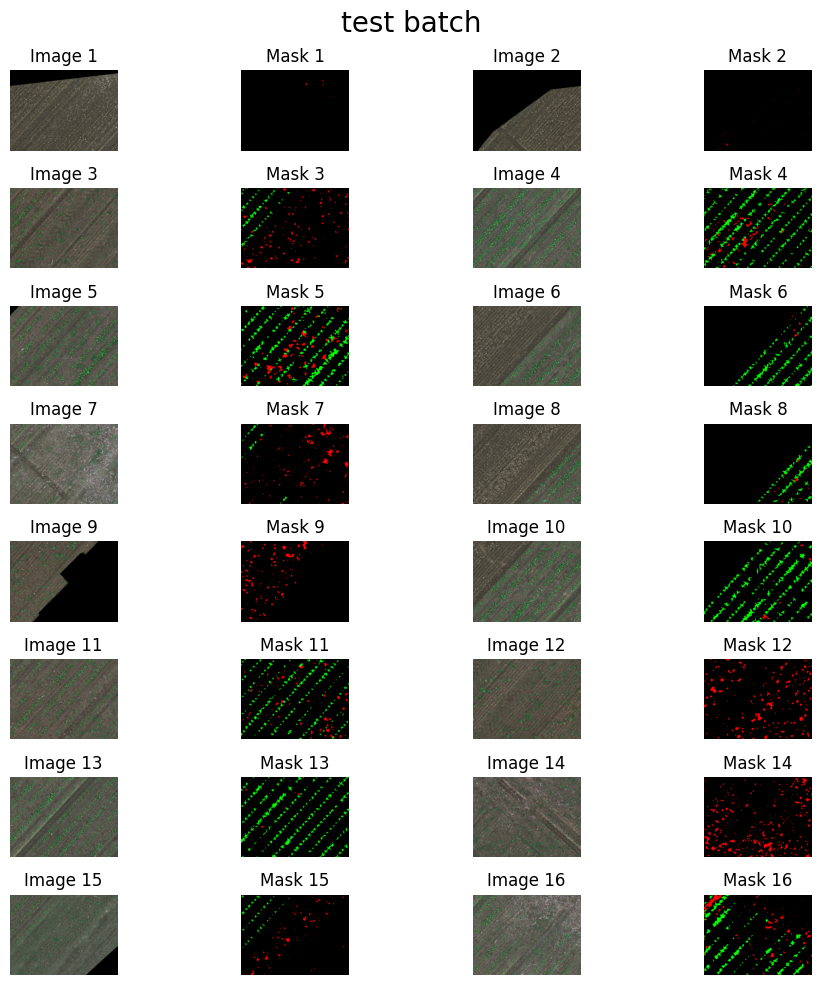

In [264]:
 for batch_idx, (images, masks) in enumerate(testDL):
        # Ch)
        if batch_idx == 0:

            fig, axs = plt.subplots(8, 4, figsize=(10, 10))
            axs = axs.flatten()
            j=0
            for i in range(16):
                img_np = F.to_pil_image(images[i])
                mask_np = F.to_pil_image(masks[i])

                # Plot the image
                axs[j].imshow(img_np)
                axs[j].axis('off')
                axs[j].set_title(f'Image {i+1}')

                # Plot the corresponding mask
                axs[j+1].imshow(mask_np, cmap='gray')
                axs[j+1].axis('off')
                axs[j+1].set_title(f'Mask {i+1}')
                j += 2
                
            plt.suptitle('test batch', size = 20)
            plt.tight_layout()